In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline


# Clustering and Text Analysis

The workshop task this week involves unsupervised learning - an exercise in clustering.   We'll use a the Pokemon dataset to walk through the process of kmeans and hierarchical clustering.  We'll then introduce a text dataset for you to experiment with text analysis.

## Pokemon Clustering

The Pokemon dataset that we used in Week 5 is a good example to use for clustering as it has a number of numerical fields giving the properties of each Pokemon.  We can also imagine that there might be different types of Pokemon within the data, so using clustering methods to find the different types is a reasonable approach.  

First we read the data from the CSV file, we'll use the Pokemon name as the data frame index and drop the first column which is a useless index number. 

In [24]:
df = pd.read_csv('Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now you should apply the kMeans clustering method to this data. The first step is to select just the numerical fields in the data.  You can either drop the non-numerical fields or make a new data frame containing just the numerical ones (I suggest making a new data frame).

Then apply the kMeans clustering function to the data, following the steps in the lecture notes and text book.  Since we don't have any real idea how many clusters there could be in the data, start with a small number of clusters (eg. 4) just to make it easier to understand the clusters.

In [26]:
# Selecting numerical columns
nd = df.select_dtypes(include=[np.number])

# Display the first few rows of the numerical data
print(nd.head())

            Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage
Name                                                                  
Bulbasaur     318  45      49       49       65       65     45      1
Ivysaur       405  60      62       63       80       80     60      2
Venusaur      525  80      82       83      100      100     80      3
Charmander    309  39      52       43       60       50     65      1
Charmeleon    405  58      64       58       80       65     80      2


In [30]:
# Set the number of clusters
k = 4

# Applying k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(nd)

# Assign the cluster labels to the original dataframe
nd['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(nd.head())


            Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  \
Name                                                                     
Bulbasaur     318  45      49       49       65       65     45      1   
Ivysaur       405  60      62       63       80       80     60      2   
Venusaur      525  80      82       83      100      100     80      3   
Charmander    309  39      52       43       60       50     65      1   
Charmeleon    405  58      64       58       80       65     80      2   

            Cluster  
Name                 
Bulbasaur         0  
Ivysaur           2  
Venusaur          3  
Charmander        0  
Charmeleon        2  


C:\Users\aaliy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Once you have applied kMeans you will have some results to explore.  Your goal is to understand the clusters that have been produced. If you know something about Pokemon you might be able to recognise similarities between members of each cluster, if not (and even if you do) you need to understand what the members of each cluster have in common. 

The first task is to find out what the members of each cluster are.  To do this, generate a set of cluster labels using `km.predict()` on your original data and add this to the data frame (see the lecture notes).  Now, explore the difference between each cluster:
 
 * find the mean value for each column by cluster, you can do this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method
 * from these means, can you characterise the four clusters that were found, eg. "Cluster 0 are early stage Pokemon with relatively low HP, Attack and Defence ratings".  Provide descriptions like this of each cluster.
 * Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering.  Comment on the separation of clusters in your plot.
 * Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters? 

In [32]:
#Getting the mean for each cluster
cluster_means = nd.groupby('Cluster').mean()
print(cluster_means)


              Total         HP     Attack     Defense    Sp. Atk    Sp. Def  \
Cluster                                                                       
0        302.116667  46.616667  54.216667   53.850000  47.916667  45.983333   
1        469.687500  69.687500  94.375000  118.125000  62.812500  61.250000   
2        428.567568  68.810811  72.594595   61.945946  72.324324  74.594595   
3        525.526316  85.210526  92.263158   76.026316  94.263158  91.315789   

             Speed     Stage  
Cluster                       
0        53.533333  1.083333  
1        63.437500  1.750000  
2        78.297297  1.864865  
3        86.447368  2.026316  


•	Cluster 0: This represents Pokemon that have lower stats all across the board and are in their early stages of evolution.

•	Cluster 1: These Pokemon have higher speed and special attack points than the early stage Pokemon.

•	Cluster 2: These are mid-level Pokemon with moderate stats and represent a balanced fighting level.

•	Cluster 3: These are advanced stages Pokemon that are in their final evolutionary stage. They have high stats of attack, defense, hp etc and are much more powerful than the previous counter parts.


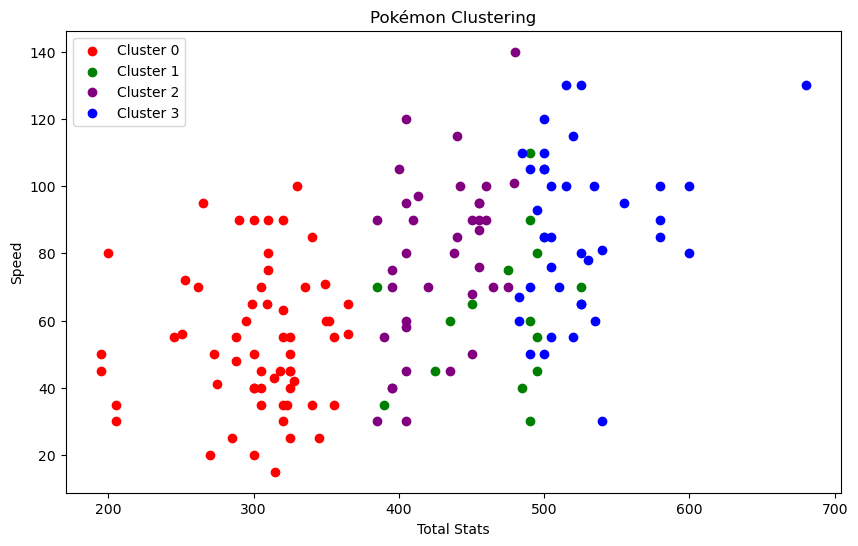

In [48]:
# Select two distinct columns
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'purple', 'blue']

for i in range(k):
    plt.scatter(nd[nd['Cluster'] == i]['Total'], nd[nd['Cluster'] == i]['Speed'], color=colors[i], label=f'Cluster {i}')

plt.xlabel('Total Stats')
plt.ylabel('Speed')
plt.title('Pokémon Clustering')
plt.legend()
plt.show()
plt.show()


C:\Users\aaliy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                Total         HP      Attack     Defense     Sp. Atk  \
Cluster_6                                                              
0          401.821429  61.035714   69.214286   71.750000   70.535714   
1          494.000000  78.000000  102.800000  109.133333   72.333333   
2          480.485714  74.771429   80.228571   66.257143   79.142857   
3          559.312500  98.062500   99.250000   83.125000  102.062500   
4          314.170213  48.319149   57.404255   55.680851   51.361702   
5          227.600000  36.000000   38.100000   39.000000   26.100000   

             Sp. Def      Speed     Stage   Cluster  
Cluster_6                                            
0          64.071429  65.214286  1.857143  1.642857  
1          71.333333  60.400000  2.266667  1.666667  
2          85.028571  95.057143  1.828571  2.428571  
3          95.937500  80.875000  1.812500  3.000000  
4          48.893617  52.510638  1.021277  0.000000  
5          29.600000  58.800000  1.200000  0.

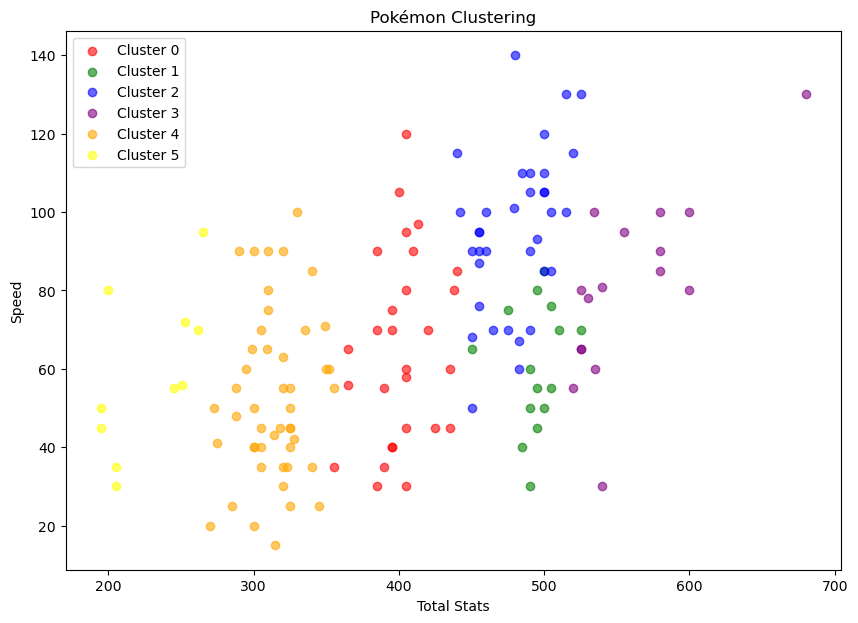

In [60]:
# Using more clusters
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(nd)
nd['Cluster_6'] = kmeans_6.labels_


new_cluster_means = nd.groupby('Cluster_6').mean()
print(new_cluster_means)

#plotting
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow'] 

for i in range(6):
    plt.scatter(nd[nd['Cluster_6'] == i]['Total'], nd[nd['Cluster_6'] == i]['Speed'],
                color=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Total Stats')
plt.ylabel('Speed')
plt.title('Pokémon Clustering')
plt.legend()
plt.show()



### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

Apply Hiearchical clustering to the data and plot the dendogram.  From this diagram, how many clusters should the data be separated into?   Can you characterise these clusters? 

In [69]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Using  'ward'
linkage_matrix = linkage(nd, method='ward')

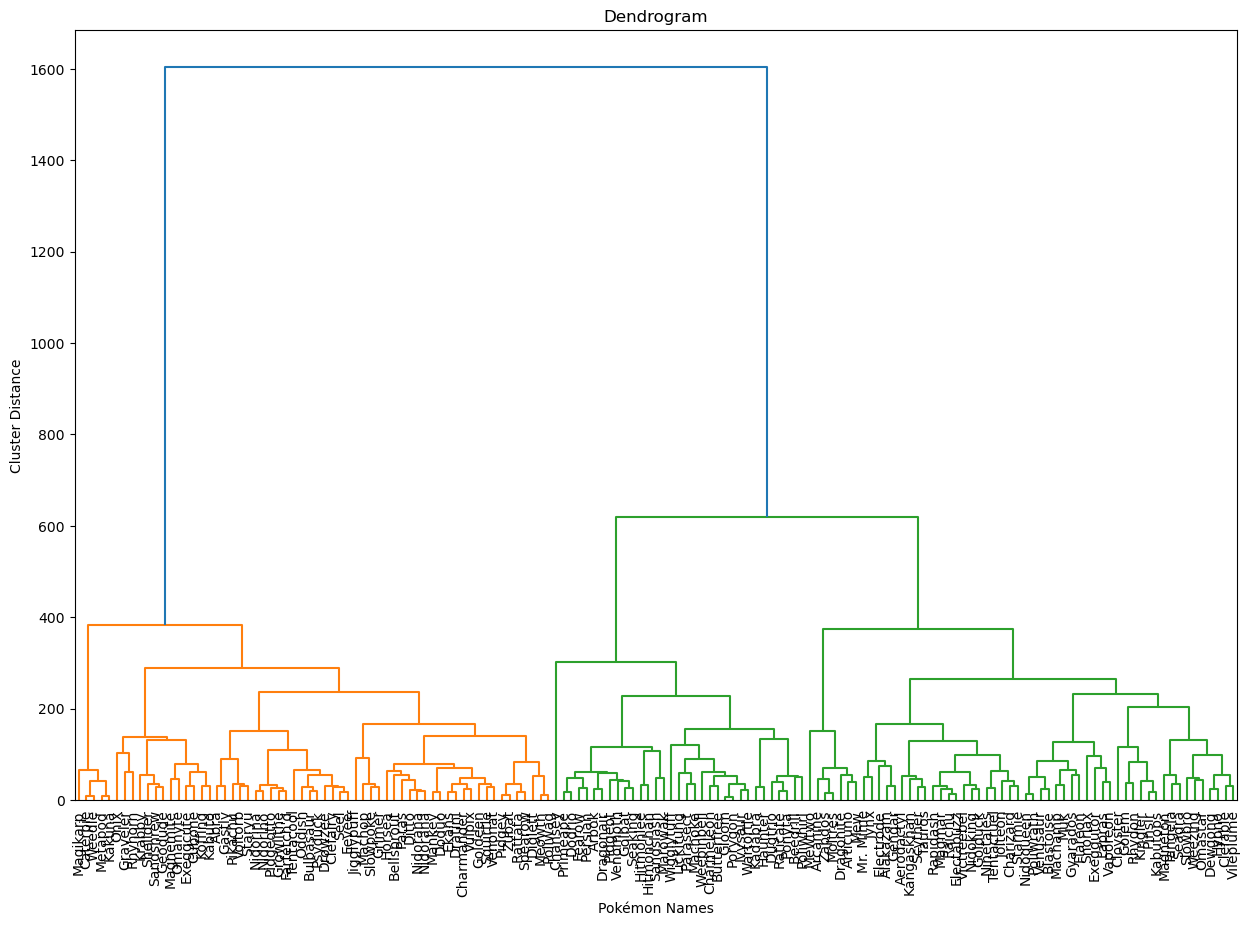

In [71]:
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=nd.index.values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Pokémon Names')
plt.ylabel('Cluster Distance')
plt.show()

In [79]:
from scipy.cluster.hierarchy import fcluster
# Assuming a cut-off distance of 600 for demonstration
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
nd['Cluster_Labels'] = cluster_labels

cluster_characteristics = nd.groupby('Cluster_Labels').mean()
print(cluster_characteristics)



                     Total         HP     Attack    Defense    Sp. Atk  \
Cluster_Labels                                                           
1               304.870968  46.564516  54.725806  56.548387  47.580645   
2               422.939394  70.333333  76.545455  62.787879  66.393939   
3               510.892857  80.142857  89.928571  84.357143  89.232143   

                  Sp. Def      Speed     Stage   Cluster  Cluster_6  
Cluster_Labels                                                       
1               45.951613  53.500000  1.096774  0.032258   3.838710  
2               72.424242  74.454545  1.909091  1.939394   0.696970  
3               84.464286  82.767857  1.928571  2.464286   1.964286  


## Text Analysis

Text is an important data source and in the lecture we looked at how to use word vectors to create features from text. We can use this method to derive a numerical vector from each text and then perform clustering on the texts.  

We'll use a set of book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html) in this experiment.  This contains a large number of summaries (16,559) but we'll work with just the first 100 books which usefully include some of the 'books' from the Bible which we might expect to form a cluster different to the other texts.  

The first task is to read the data. It is made available in tab-separated format but has no column headings. We can use `read_csv` to read this but we need to set the separator to `\t` (tab) and supply the column names.  The names come from the [ReadMe](files/booksummaries/README.txt) file.

In [ ]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("files/booksummaries/booksummaries.txt", sep="\t", header=None, names=names)

# select just the first 100 books
books = books[:100]

books.head()

To analyse the text, you first need to compute the numerical features. To do this, use the `TfidfVectorizer` from the sklearn library (this is already imported at the top of this notebook) following the method used in the lecture.  Use a small number of features (word) in your vectorizer (eg. 50-100) just to simplify understanding the process.  

Once you have done this you can apply the clustering methods to this data just as you did above for the Pokemon data. Use the same approach to cluster these 100 books and understand the clusters you find. Note, the features you have now will be word TFIDF scores and you probably have 50-100 of them making it harder to understand the clusters numerically. So, you will have to look at the book titles, authors and publication dates to see if you can understand what clusters have been formed. In particular, look to see if the Bible books have been put into the same cluster distinct from the other texts. 